# 1 Préparation des données

In [367]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [286]:
# Chargement de la dataset et visualisation
data1 = pd.read_csv("housing.csv")
print("----------> Jeu de données \n")
data1

----------> Jeu de données 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [287]:
# Affichage colomne
print("--------> Affichage colomne\n")
print(data1.columns)

--------> Affichage colomne

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [288]:
# Code qui affiche les 10 premières valeurs de median_house_value
print("-------> Colomne median_house_value\n")
print(data1["median_house_value"].head(10))


-------> Colomne median_house_value

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64


### 1.2.2

In [289]:
# Code qui affiche le nombre de lignes et de colonnes des données, le type des at- tributs et le nombre de valeurs non nulles.
print("--------> Infos sur le fichier , attributs, types.... \n")
print(data1.info())

--------> Infos sur le fichier , attributs, types.... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


total_bedrooms possède des données manquantes.

### 1.2.3

In [290]:
# Code qui affiche l’occurrence des valeurs utilisées dans cet attribut.
print("--------> Nombre d'occurences de ocean_proximity\n")
print(data1["ocean_proximity"].value_counts())


--------> Nombre d'occurences de ocean_proximity

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


### 1.2.4

In [291]:
# Code qui affiche des statistiques sur les attributs de ton jeu de données.
print("------> Statistiques du jeu de données\n")
print(data1.count())

------> Statistiques du jeu de données

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64


In [328]:
# Détermination de la Target et des prédicables
X = data1.iloc[:, 0:8]
Y = data1["median_house_value"]
print("-----> Affichage de X ")
print(X)

-----> Affichage de X 
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  household

### 1.2.5

-------> Histogramme des attributs



array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

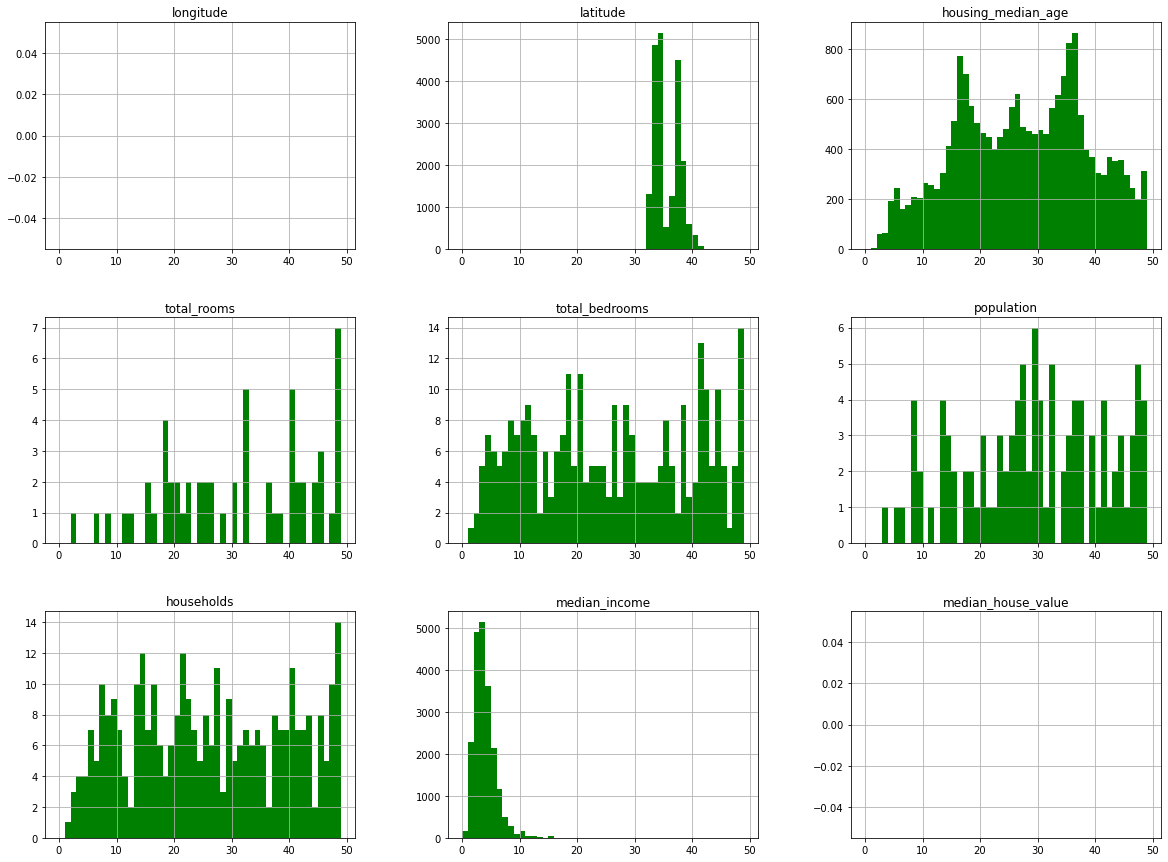

In [329]:
# Histogramme des différents attributs
print("-------> Histogramme des attributs\n")
data1.hist(bins=range(50), figsize=(20, 15), color ='green')



### 1.3.1

In [330]:
# Code qui partitionne les données en base d’apprentissage et base de test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [331]:
# Affichage de l'en-tête de la base de test
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850


In [332]:
# Affichage de Y_test
Y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

### 1.4.1

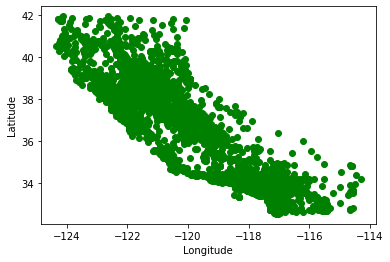

In [333]:
# Code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour le type scatter dans la fonction plot pour l’affichage et une valeur d’alpha 
plt.scatter(x=data1['longitude'], y=data1['latitude'], color = 'green')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

### 1.4.2

No handles with labels found to put in legend.


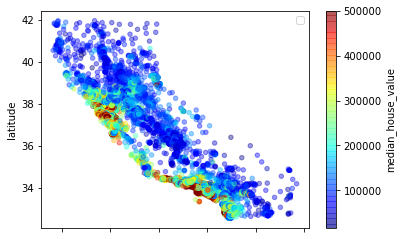

In [334]:
# Code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target).
data1.plot(kind="scatter", x ="longitude", y ="latitude", alpha=0.4, c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()

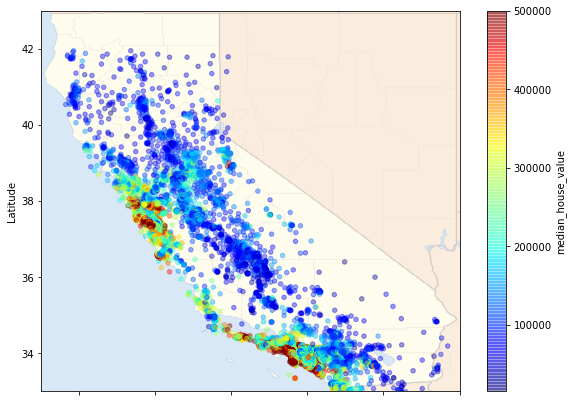

In [335]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
data1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4
                      )
plt.imshow(california_img, extent=[-125, -114, 33, 43], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [336]:
# Corrélations pour median_house_value
corr_data1 = data1.corr()
corr_data1["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

## 1.5 Nettoyage des données

In [337]:
# Suppression de la colomne median_house_value et copie des labels
data1.drop("median_house_value", axis=1)
data1_labels =data1.columns.copy()
data1_labels

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### 1.5.2

In [338]:
# Suppression des données manquantes sur la colomne total_bedrooms
# data1.dropna(subset=["total_bedrooms"])

# Suppression de la colomne total_bedrooms
# data1.drop("total_bedrooms",axis=1)

# code qui remplace les valeurs manquantes par la médiane.
median = data1["total_bedrooms"].median()
data2["total_bedrooms"].fillna(median, inplace=True)



### 1.5.3

In [339]:
# Affichage des 10 premières valeurs de la colomne ocean_proximity
data2['ocean_proximity'].head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [340]:
# Transformation des valeurs qualitatives en des valeurs numériques de la colomne ocean_proximty
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_e = data1["ocean_proximity"]
data_encoded = encoder.fit_transform(data_e)


### 1.5.4

In [341]:
# Affichage des réultats de ocean_proximity après LabelEncoder
data_encoded

array([3, 3, 3, ..., 1, 1, 1])

## 2. Sélection d'apprentissage

### 2.1

In [342]:
# Code permettant d’appliquer la régression linéaire sur les données d’apprentissage.
from sklearn.linear_model import LinearRegression
linearR = LinearRegression()
linearR.fit(X_train, Y_train)

LinearRegression()

In [343]:
# Code qui prédit les classes de la base d’apprentissage
Y_predict = linearR.predict(X_train)


In [344]:
# Affichage de valeurs prédictes
Y_predict

array([181313.23430336, 286451.78145111, 263328.07605753, ...,
       191338.67423603, 273178.05856515, 278432.75202799])

In [345]:
# Affichage de valeurs cibles réelles
Y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

### 2.3

In [370]:
# Mesure RMSE du modèle de la régression linéaire
from sklearn.metrics import mean_squared_error
mseL = mean_squared_error(Y_train, Y_predict)
print('RMSE Linear Regresion = ')
print(mseL)

RMSE Linear Regresion = 
4811134397.884195


### 2.4

In [371]:
# Code permettant d’appliquer l'arbre de décision sur les données d’apprentissage.
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

### 2.5

In [372]:
# RMSE de DecisionTreeRegressor
mseDTR = mean_squared_error(Y_train, Y_predict)
print('RMSE Decision Tree Regression = ')
print(mseDTR)


RMSE Decision Tree Regression = 
4811134397.884195


### 2.5

In [384]:
# Validation croisée sur l'arbre de décision
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(DTregressor, X_train, Y_train,scoring ="neg_mean_squared_error", cv = 10)


In [385]:
# MSE de chaque fold
rmse_cvs =np.sqrt(-cvs)
print('RMSE Validation Croisée = ')
print(rmse_cvs)


RMSE Validation Croisée = 
[71689.14745536 73026.34926911 67203.18364379 68279.38299113
 70918.06638446 66508.94683068 68863.21082944 70054.20877068
 70207.91540238 71344.93573593]


In [386]:
# Moyenne des MSE
rmse_cvs.mean()

69809.53473129666

In [387]:
# Ecart type de tous les folds
rmse_cvs.std()

1964.9313152145362

In [388]:
# Validation Croisée sur la régression linéaire
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(linearR, X_train, Y_train,scoring ="neg_mean_squared_error", cv = 10)



In [389]:
# MSE de chaque fold
rmse_cvs =np.sqrt(-cvs)
print('RMSE Validation Croisée = ')
print(rmse_cvs)



RMSE Validation Croisée = 
[66170.13482881 72783.99723185 68950.52987763 67640.0509114
 70438.49542911 66523.65704676 66541.25492139 70992.53769382
 74292.46725992 70675.67306462]


In [390]:
# Moyenne des MSE
rmse_cvs.mean()

69500.87982653153

In [391]:
# Ecart type de tous les folds
rmse_cvs.std()

2659.0438508863526

## 3 Fine-Tuning

### 3.1 Green Search

In [392]:
# Création d'un objet de la classe RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()


In [393]:
# Création de la variable param_grid
param_grid = {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RFregressor, param_grid, cv = 5)
grid_search.fit(X_train, Y_train)


In [365]:
#  Affichage les meilleurs paramètres de la méthode RandomForestRegressor en utilisant la fonction best_params_
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [326]:
# Affichage des résultats des 12 combinaisons avec la fonction grid-search


### 3. 2 Evaluation sur la base de test

In [402]:
# Remplacement des valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane
median = X_test["total_bedrooms"].median()
X_test["total_bedrooms"].fillna(median, inplace=True)


In [403]:
# Transformation des valeurs textuelles de "ocean_proximity" en valeurs numériques
data_e2 = data1["ocean_proximity"]
data2_encoded = encoder.fit_transform(data_e2)

In [404]:
# Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_ du module GridSearchCV
model3 = grid_search.best_estimator_

In [405]:
# Calculer la valeur RMSE du modèle sur la base de test
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#mean_squared_error(Y_test, Y_predict)